In [1]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

import funciones_auxiliares_hito_2 as aux

# warnings.filterwarnings('ignore')
sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
df = pd.read_csv('income-db.csv')
df = df.replace('?', np.nan)

# Analisis del vector objetivo (```income```)

,Frecuencia,Porcentaje
<=50K,37155,0.760718
>50K,11687,0.239282


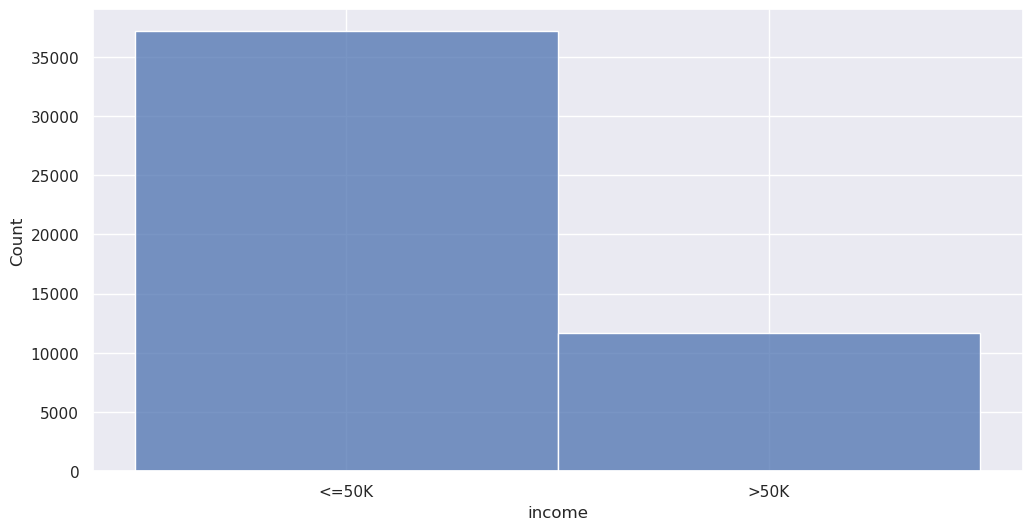

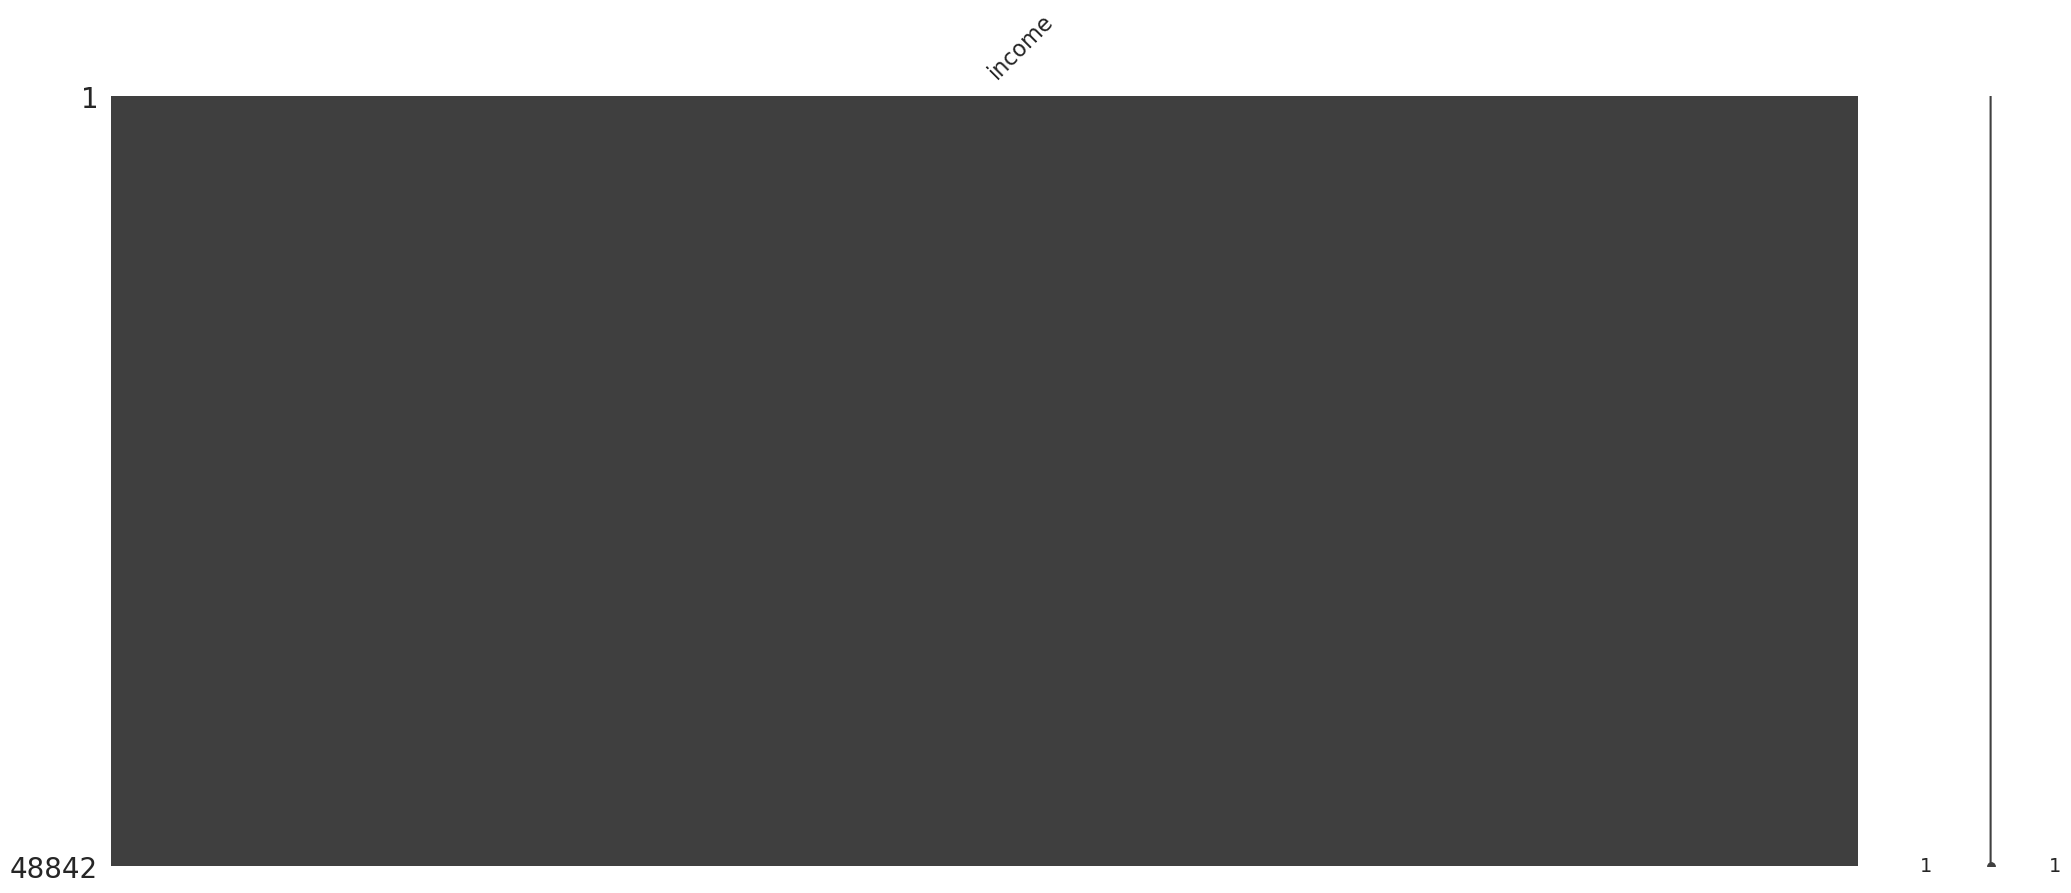

In [3]:
vector_objetivo = df['income']
aux.analizar_vector_objetivo_discreto(vector_objetivo)

De los resultados se puede ver que existen 37155 (76% de los datos) personas que ganan igual o
menos de 50K dolares anuales. Por otro lado, existen 11687 (24% de los datos) personas que ganan
sobre los 50K dolares anuales.

Ademas, la variable carece de algun valor faltante. 

# Analisis de variables independientes (todas menos ```income```)

Analizando todas las variables numericas 



,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


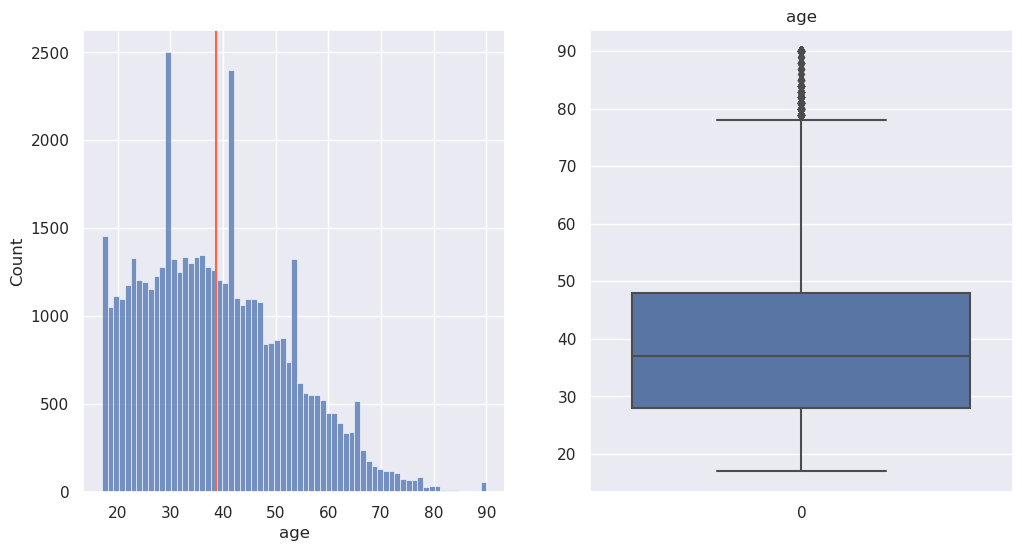

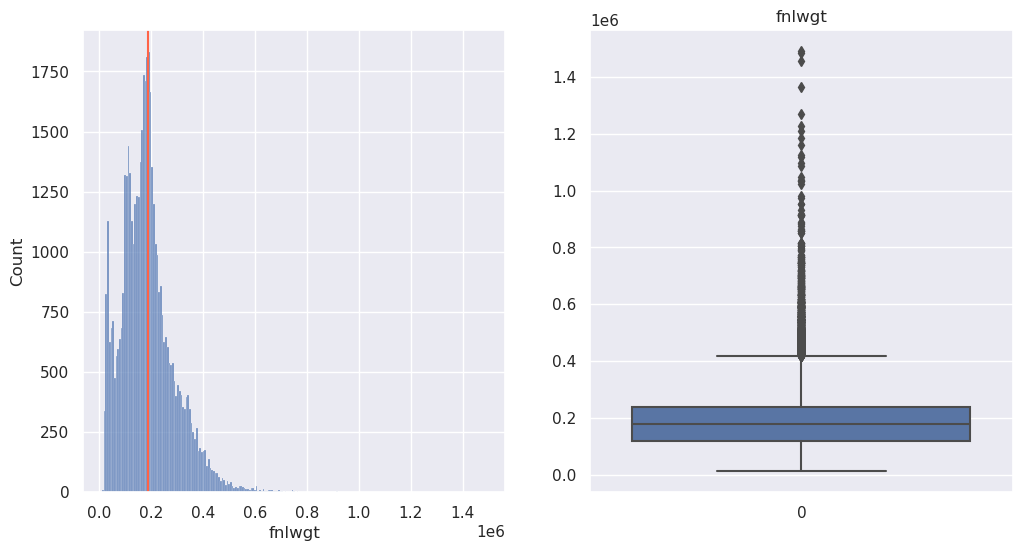

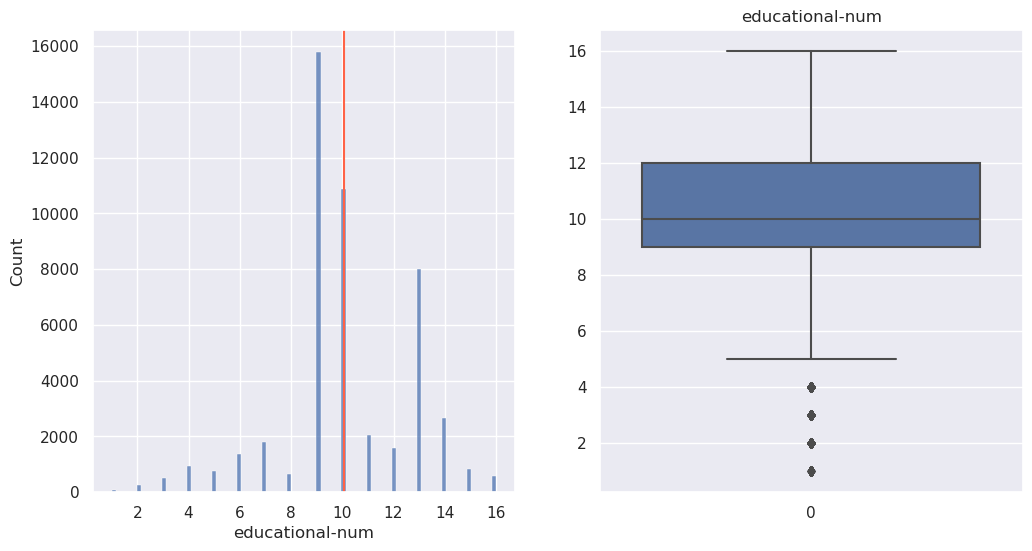

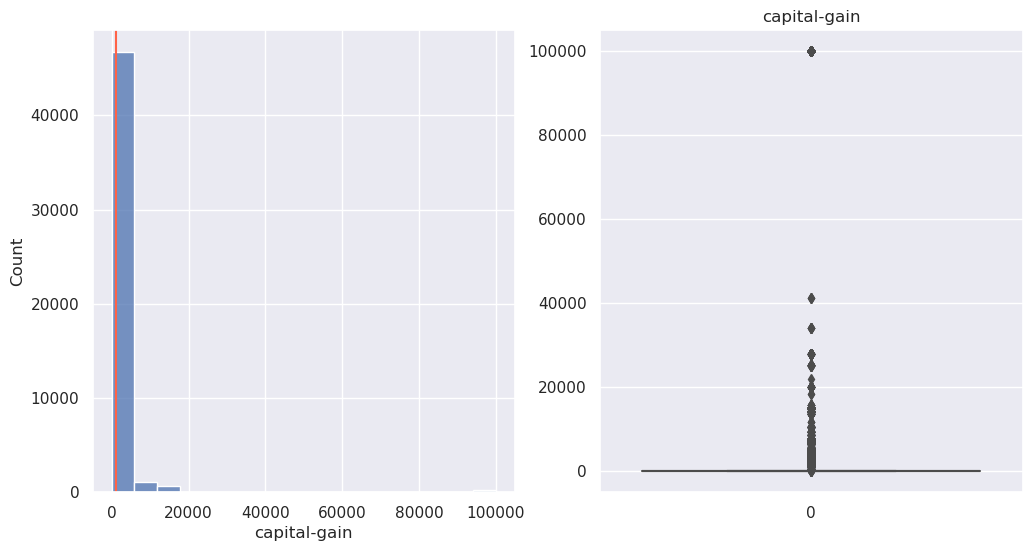

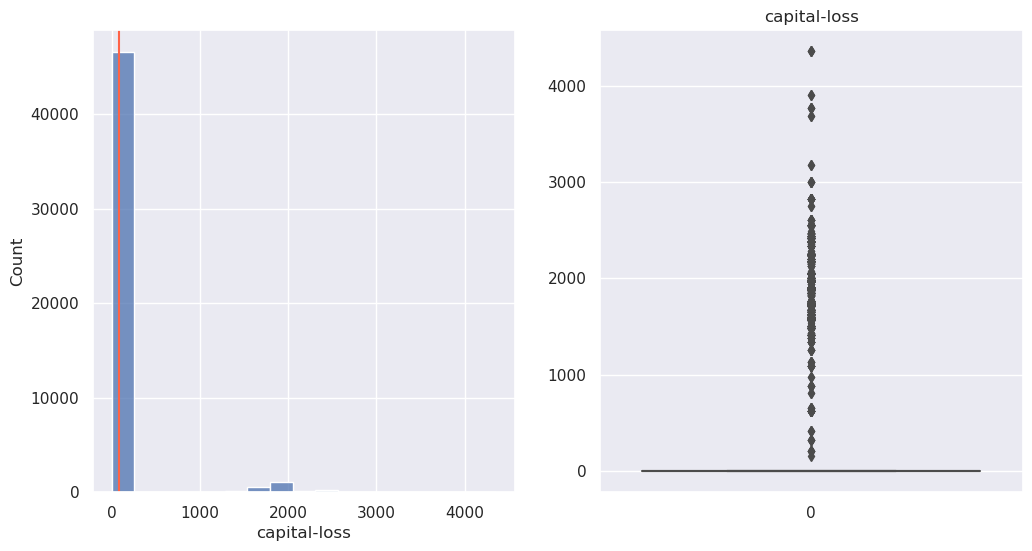

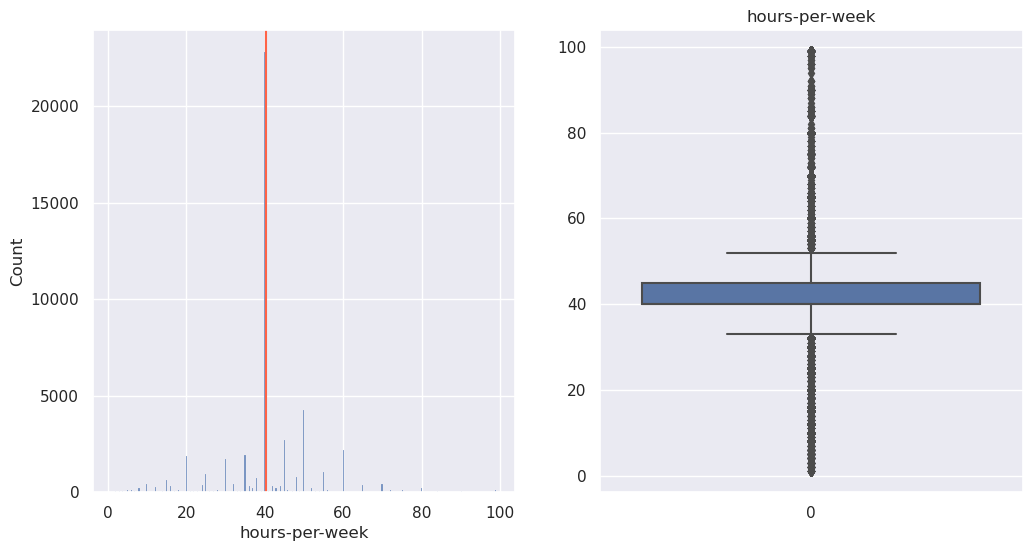

Analizando todas las variables categoricas 

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


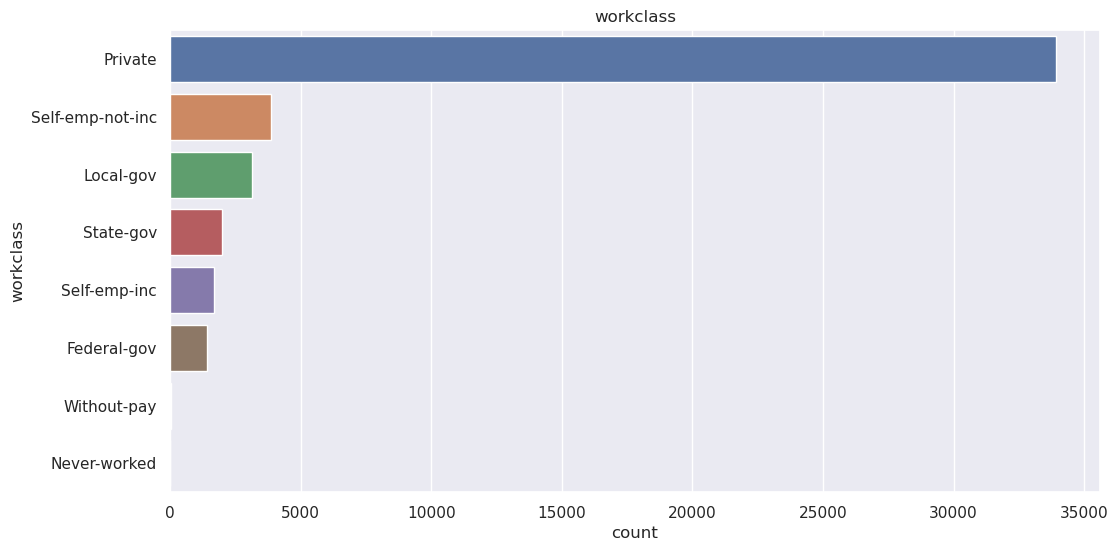

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64


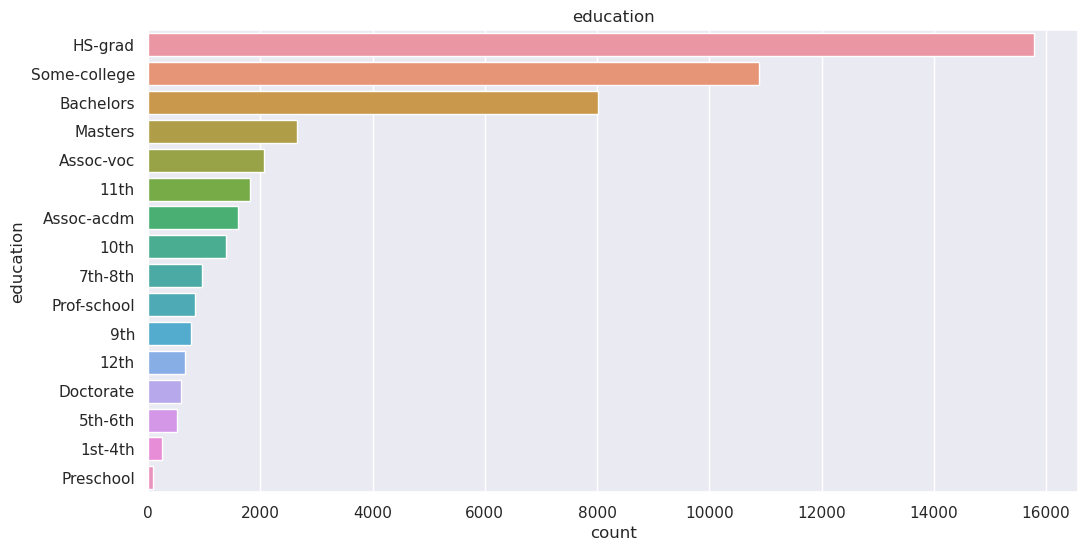

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64


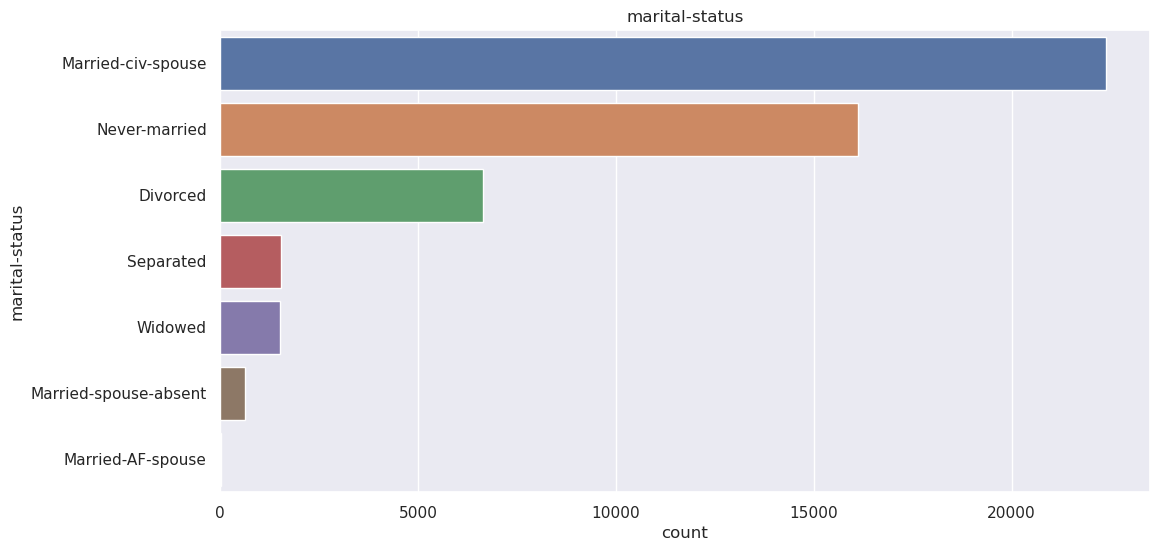

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64


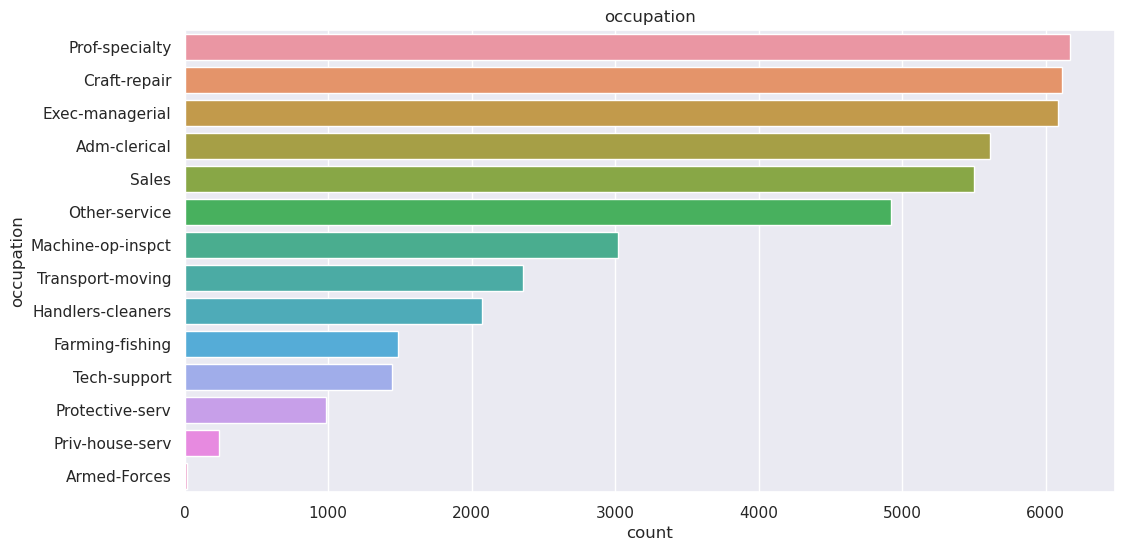

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64


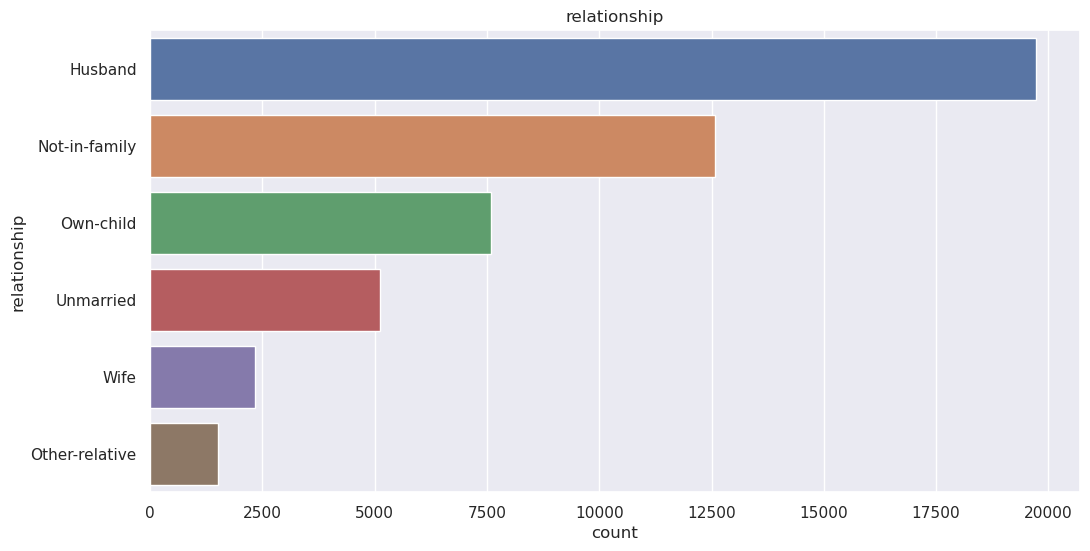

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64


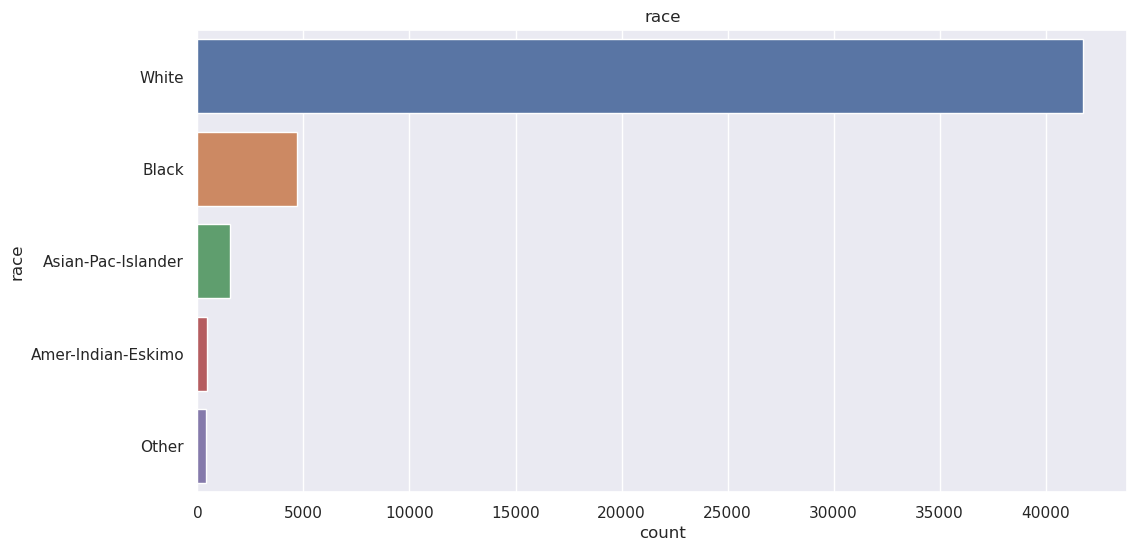

gender
Male      32650
Female    16192
Name: gender, dtype: int64


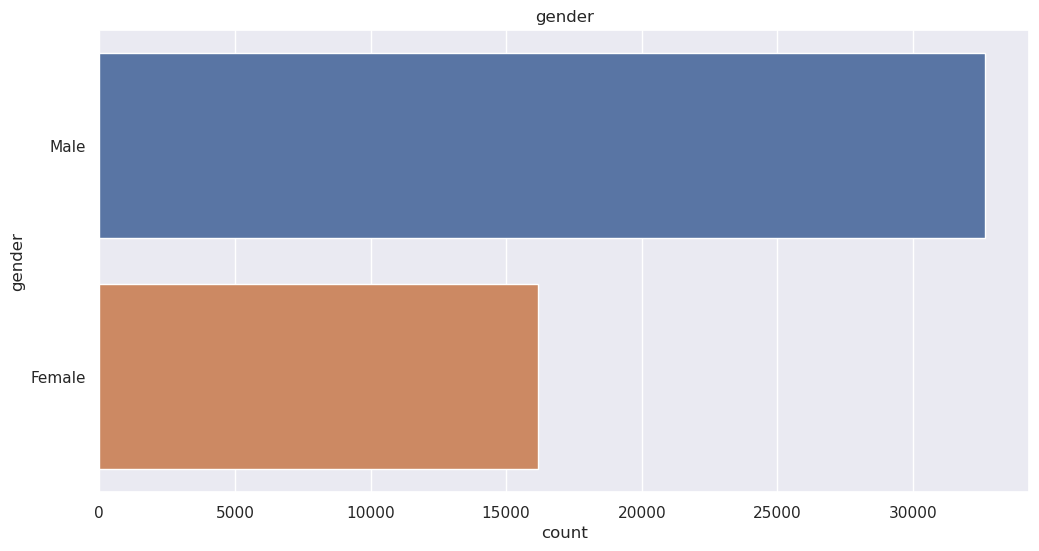

native-country
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

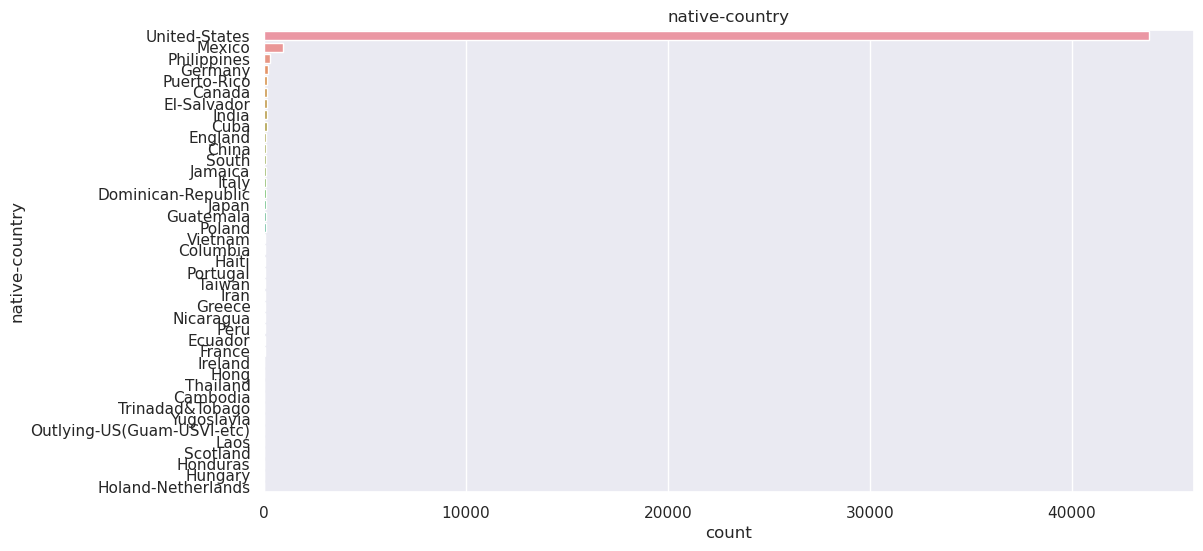

,columna,cantidad_na,porcentaje_na
age,age,0,0.00
workclass,workclass,2799,5.73
fnlwgt,fnlwgt,0,0.00
education,education,0,0.00
educational-num,educational-num,0,0.00
marital-status,marital-status,0,0.00
occupation,occupation,2809,5.75
relationship,relationship,0,0.00
race,race,0,0.00
gender,gender,0,0.00


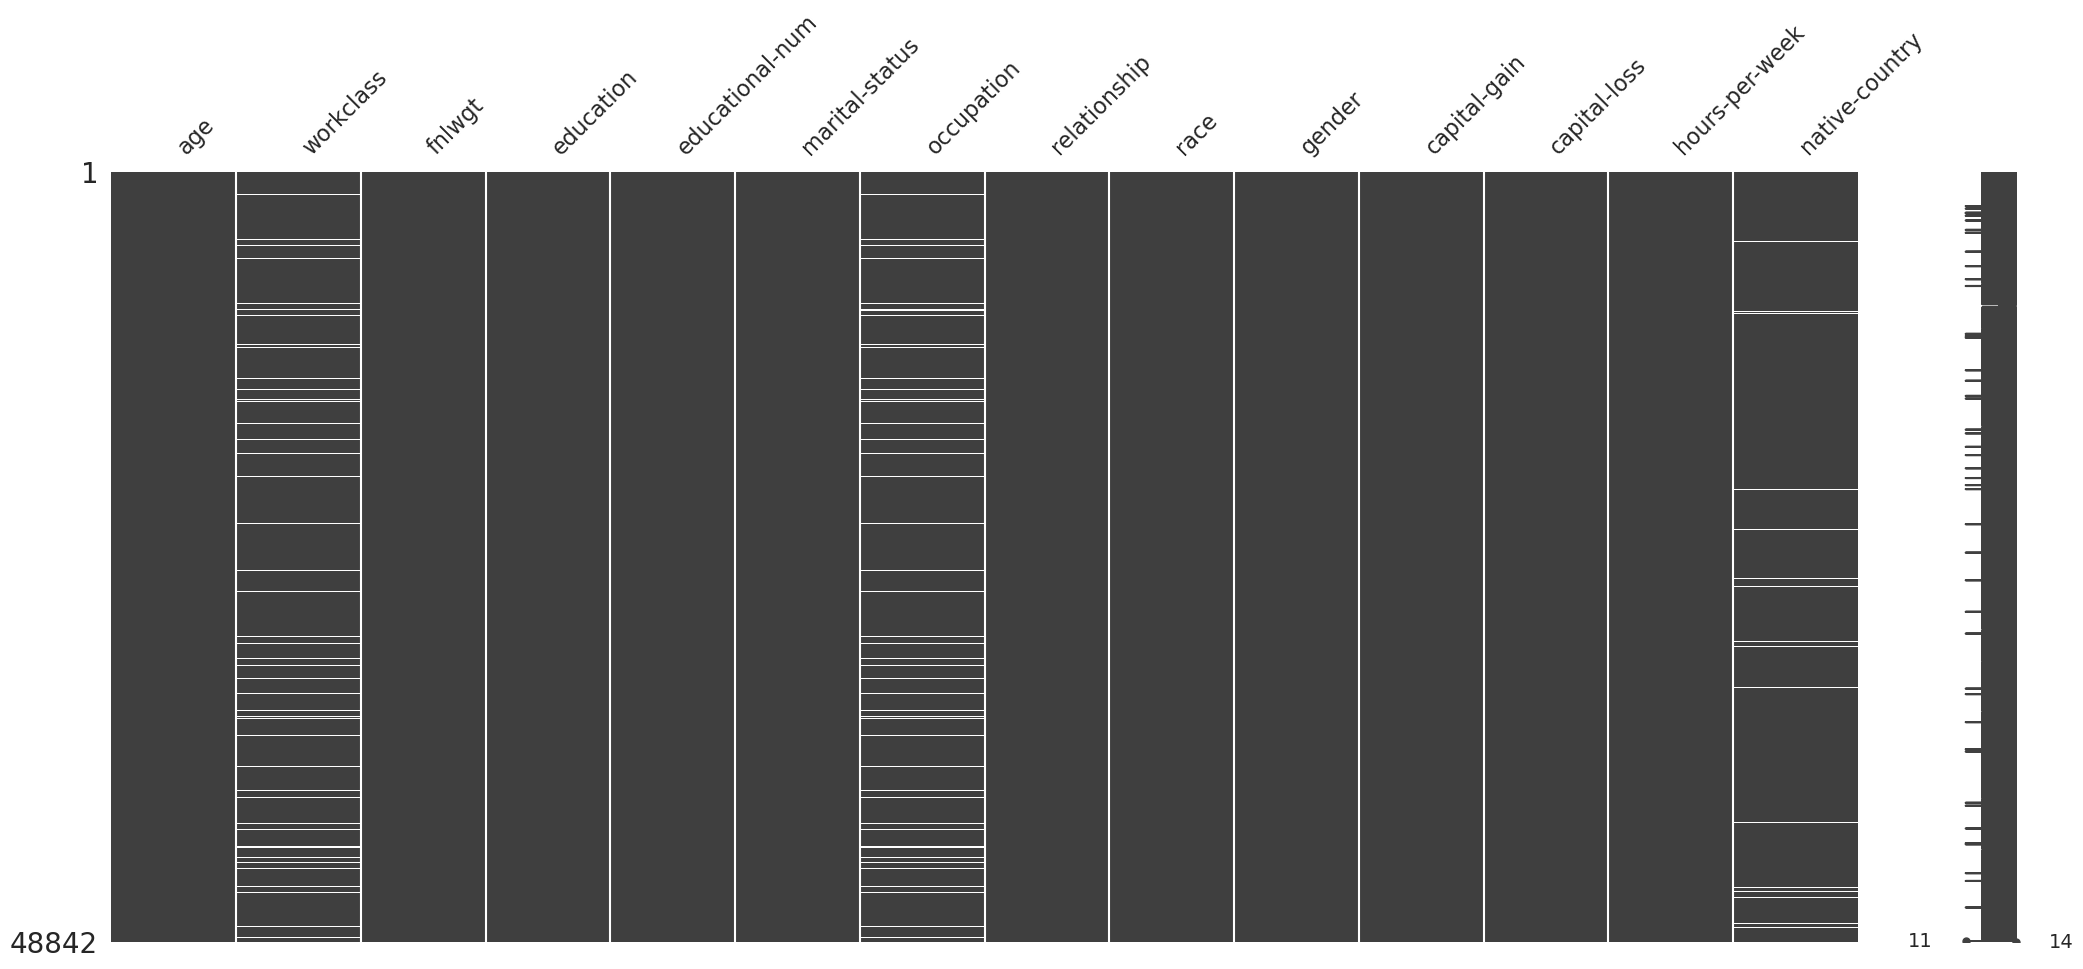

In [4]:
variables_independientes = df.drop(columns='income')
numericas, categoricas = aux.separar_df_a_numericas_categoricas(variables_independientes)
aux.analizar_distr_todas_las_variables_numericas(numericas)
aux.analizar_dist_todas_las_variables_categoricas(categoricas)
aux.analizar_valores_faltantes(variables_independientes)

# Analisis valores faltantes global

In [5]:
aux.mostrar_perdida_de_datos(df)

Al droppear todos los valores faltantes en la DataFrame se pierde el 7.41% de los datos totales


# Analizar correlacion entre variables disponibles

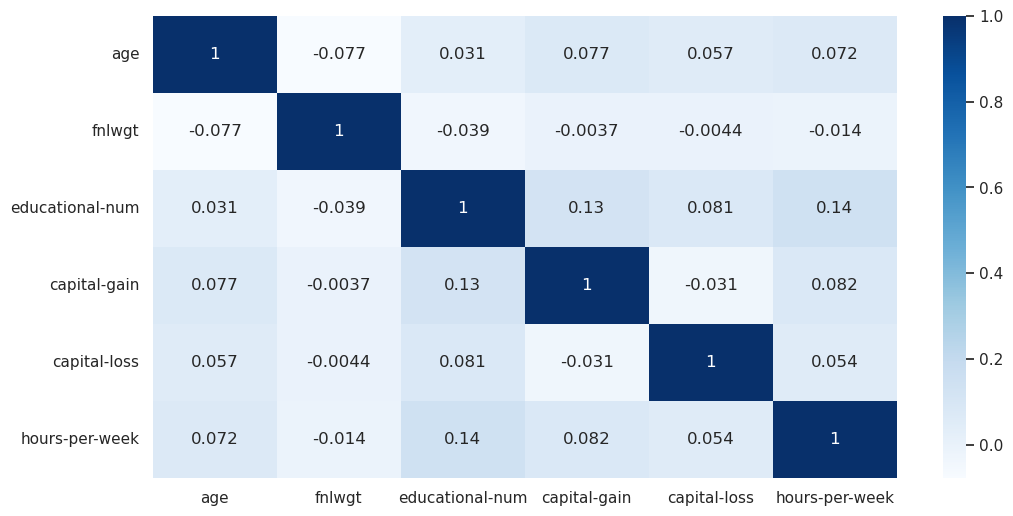

In [6]:
aux.analizar_correlacion_todas_las_variables(df)

In [7]:

# O sea, que al droppear los datos faltantes, se pierde el 7% de los datos originales.